This notebook contains the code for the analysis of the collected data using GitHub API and the Kaggle.

## Data Combination

In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

In [4]:
dataf = pd.read_csv('kaggle_data.csv', index_col=0, delimiter=',')
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   repo_name       1500 non-null   object
 1   star            1500 non-null   object
 2   fork            1500 non-null   object
 3   watch           1500 non-null   object
 4   issue           1500 non-null   object
 5   tags            1500 non-null   object
 6   description     1480 non-null   object
 7   contributers    1500 non-null   object
 8   license         1500 non-null   object
 9   repo_url        1500 non-null   object
 10  most_used_lang  1297 non-null   object
dtypes: object(11)
memory usage: 140.6+ KB


In [5]:
data_api = pd.read_csv('github_api.csv', index_col=0, delimiter=',')
data = pd.concat([dataf, data_api], ignore_index=True)

In [6]:
# data.drop('Unnamed: 0.1',axis=1,inplace=True)

In [7]:
data.head()

,repo_name,star,fork,watch,issue,tags,description,contributers,license,repo_url,most_used_lang
0,keras,47.9k,18.1k,2.1k,"2,940","['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,49,View license,https://github.com/keras-team/keras,Python
1,scikit-learn,40.3k,19.6k,2.2k,"1,505","['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,108,View license,https://github.com/scikit-learn/scikit-learn,Python
2,PythonDataScienceHandbook,23.1k,9.9k,1.5k,65,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,0,View license,https://github.com/jakevdp/PythonDataScienceHa...,Jupyter Notebook
3,Probabilistic-Programming-and-Bayesian-Methods...,21k,6.6k,1.4k,127,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",0,MIT,https://github.com/CamDavidsonPilon/Probabilis...,Jupyter Notebook
4,Data-Science--Cheat-Sheet,18.4k,8.2k,1.5k,7,[],Cheat Sheets,0,Fetching contributors,https://github.com/abhat222/Data-Science--Chea...,NaN


## Cleaning

So, we can see in the info section that some of the rows in the `description` and `most_used_lang` are null. I think most used language feature affects the popularity of the repo because the projects using trending technologies is the project which is most viewed by people. Let's see the popularity of repositories which has no language.

In [8]:
data[data['most_used_lang'].isnull()][['star', 'fork', 'most_used_lang']].head(10)

,star,fork,most_used_lang
4,18.4k,8.2k,NaN
8,14.7k,5.3k,NaN
11,12.1k,3.4k,NaN
16,10.3k,2.5k,NaN
17,9.9k,1.8k,NaN
18,9.7k,2.1k,NaN
20,8.7k,2.1k,NaN
22,7.8k,1.1k,NaN
26,7.4k,1.5k,NaN
30,6.9k,1.7k,NaN


Above, we can see that without having any language these repositories has large number of `stars` and `forks`. Then these repositories must share some resources or any useful information like this [here](https://github.com/loveunk/Deep-learning-books). So, I think replacing is the best option then dropping.

In [9]:
data['most_used_lang'] = data['most_used_lang'].fillna('no language', inplace=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   repo_name       2769 non-null   object
 1   star            2769 non-null   object
 2   fork            2769 non-null   object
 3   watch           2769 non-null   object
 4   issue           2769 non-null   object
 5   tags            2769 non-null   object
 6   description     2590 non-null   object
 7   contributers    2769 non-null   object
 8   license         2174 non-null   object
 9   repo_url        2769 non-null   object
 10  most_used_lang  2769 non-null   object
dtypes: object(11)
memory usage: 238.1+ KB


We can see that there is rows which has no any `description`. We know having description of repo makes it more attractive or easy for other's to understand the project. It also contributes in the popularity of the repo.

In [10]:
print(data[data['description'].isnull()][['most_used_lang', 'repo_url', 'star']])

     most_used_lang                                           repo_url  star
202             C++  https://github.com/oreillymedia/Learning-OpenC...  1.4k
214          Python  https://github.com/MicrocontrollersAndMore/Ope...   405
219            Java                   https://github.com/xikuqi/OpenCV   317
234             C++  https://github.com/MicrocontrollersAndMore/Ope...   217
242             C++         https://github.com/saki4510t/OpenCVwithUVC   154
...             ...                                                ...   ...
2729    no language           https://github.com/bs/oss-enterprise.git     0
2734         Groovy        https://github.com/bs/SmartThingsPublic.git     0
2758           Ruby       https://github.com/collectiveidea/bender.git     8
2759          Swift    https://github.com/collectiveidea/BTExample.git     0
2763           Ruby  https://github.com/collectiveidea/calendar_bui...    42

[179 rows x 3 columns]


We can see above that the non-descripted repo also has popularity. So, I think other than removing them I will replace it with `''`.

In [11]:
data['description'] = data['description'].fillna('', inplace=False)
len(data[data['description'].isnull()])

0

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   repo_name       2769 non-null   object
 1   star            2769 non-null   object
 2   fork            2769 non-null   object
 3   watch           2769 non-null   object
 4   issue           2769 non-null   object
 5   tags            2769 non-null   object
 6   description     2769 non-null   object
 7   contributers    2769 non-null   object
 8   license         2174 non-null   object
 9   repo_url        2769 non-null   object
 10  most_used_lang  2769 non-null   object
dtypes: object(11)
memory usage: 238.1+ KB


## Visualization

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
data.head()

,repo_name,star,fork,watch,issue,tags,description,contributers,license,repo_url,most_used_lang
0,keras,47.9k,18.1k,2.1k,"2,940","['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,49,View license,https://github.com/keras-team/keras,Python
1,scikit-learn,40.3k,19.6k,2.2k,"1,505","['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,108,View license,https://github.com/scikit-learn/scikit-learn,Python
2,PythonDataScienceHandbook,23.1k,9.9k,1.5k,65,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,0,View license,https://github.com/jakevdp/PythonDataScienceHa...,Jupyter Notebook
3,Probabilistic-Programming-and-Bayesian-Methods...,21k,6.6k,1.4k,127,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",0,MIT,https://github.com/CamDavidsonPilon/Probabilis...,Jupyter Notebook
4,Data-Science--Cheat-Sheet,18.4k,8.2k,1.5k,7,[],Cheat Sheets,0,Fetching contributors,https://github.com/abhat222/Data-Science--Chea...,no language


Let's see the popular language in the set of popular repositories dataset.

In [15]:
data['most_used_lang'].value_counts(dropna=False).head(10)

most_used_lang
Ruby                494
Python              395
no language         367
JavaScript          297
C++                 180
Java                175
Shell                97
C                    95
Jupyter Notebook     86
Dart                 79
Name: count, dtype: int64

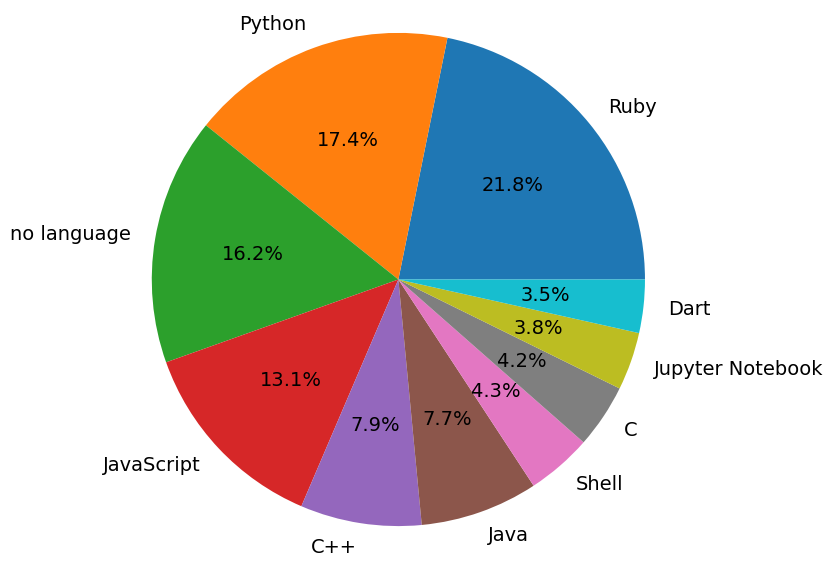

In [16]:
my_data = data['most_used_lang'].value_counts(dropna=False).head(10).values
my_labels = data['most_used_lang'].value_counts(dropna=False).head(10).index

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(my_data, labels=my_labels, autopct='%1.1f%%', textprops={'fontsize': 14})
ax1.axis('equal')
plt.show()

In the above, we can see that `Python` is the most used language in the popular repositories. And on seeing the second popular category we can say that repositories which contains some resources and useful information are popular on GitHub.

Let's see the `tag` column.

In [17]:
data['tags'].value_counts().head()

tags
[]                                                                                                                                                                                                                                                                                                                                1735
['machine-learning', 'python', 'statistics', 'data-science', 'data-analysis']                                                                                                                                                                                                                                                        3
['tensorflow', 'machine-learning', 'machine-vision', 'data', 'datascience', 'scikit-learn', 'python', 'guide', 'guidelines', 'path', 'study', 'studypath', 'learning', 'learning-python', 'computer-vision', 'nlp', 'statistics', 'business-intelligence', 'data-science', 'virgilio']                                               3
['pytorch', 'p

We can see that approx 500 repositories does not have any tag. Let's see the most used tag 😃.

In [18]:
# Store all tags in the `store_tag` dictionary with its frequency.
store_tag = dict()
for idx, each in data['tags'].items():
    # print(idx,type(each))
    tags=each.strip('][').split(', ')
  
    for tag in tags:
        tag=tag.replace("'","")
        print(tag)
        if tag in store_tag:
            store_tag[tag] += 1
        else:
            store_tag[tag] = 1

deep-learning
tensorflow
neural-networks
machine-learning
data-science
python
machine-learning
python
statistics
data-science
data-analysis
scikit-learn
numpy
python
jupyter-notebook
matplotlib
pandas
bayesian-methods
pymc
mathematical-analysis
jupyter-notebook
data-science
statistics

python
machine-learning
deep-learning
data-science
big-data
aws
tensorflow
theano
caffe
scikit-learn
kaggle
spark
mapreduce
hadoop
matplotlib
pandas
numpy
scipy
keras
natural-language-processing
data-science
big-data
machine-learning
python
cython
nlp
artificial-intelligence
ai
spacy
nlp-library
neural-network
neural-networks
deep-learning
machine-learning
deep-learning
deep-reinforcement-learning
machine-learning-from-scratch
data-science
data-mining
genetic-algorithm

ipython
jupyter
data-science
notebook
python
repl
tensorflow
machine-learning
machine-vision
data
datascience
scikit-learn
python
guide
guidelines
path
study
studypath
learning
learning-python
computer-vision
nlp
statistics
business-intel

In [19]:
list(store_tag.items())[:10]

[('deep-learning', 215),
 ('tensorflow', 92),
 ('neural-networks', 23),
 ('machine-learning', 238),
 ('data-science', 110),
 ('python', 149),
 ('statistics', 16),
 ('data-analysis', 17),
 ('scikit-learn', 24),
 ('numpy', 8)]

In [20]:
[tag[1] for tag in list(store_tag.items())[:10]]

[215, 92, 23, 238, 110, 149, 16, 17, 24, 8]

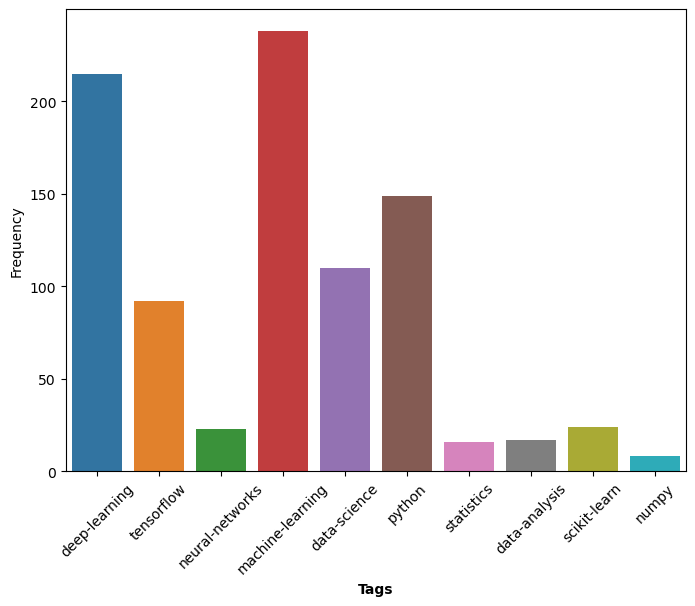

In [21]:
fig, ax = plt.subplots(figsize=(8,6))
top_10_tag = [tag[0] for tag in list(store_tag.items())[:10]]
freq = [tag[1] for tag in list(store_tag.items())[:10]]

sns.barplot(x=top_10_tag, y=freq, ax=ax)
ax.set_xlabel('Tags', fontweight ='bold')
ax.set_ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Above we can see that `machine-learning` is the most used tag in the popular repositories followed by `deep-learning`, `python` and so on. All comes under the data science skills.

## Feature Engineering

As to proceed for training model we need to convert features into numerical types. For <em>tags</em> feature, we will find the occurance of each tags of repo in terms of percentage and add them.
<br> 
For each  unique tag in tags:
<br>
<br>
<center>
      (sum occurance_of_tag)/vocabulary, vocabulary = total number of tags, and then for each tuple in tags we will add the ratios <br> 
    (sum_{n=0} ^ {len(list)} ratios) * 100
</center>

In [22]:
# it pops '' key from dictionary and return its value
store_tag.pop('')
vocabulary=sum(store_tag.values())

In [23]:
def perc(each):
    
    tags=each.strip('][').split(', ')
    l=len(tags)
    
    sum_of_perc=0
    for tag in tags:
        tag=tag.replace("'", "")
        if tag in store_tag:
            sum_of_perc += (store_tag[tag]/vocabulary)
   
    return (sum_of_perc*100)

In [24]:
data['tag_ratio']=data['tags'].apply(perc).astype(float)
data[['tags', 'tag_ratio']]

,tags,tag_ratio
0,"['deep-learning', 'tensorflow', 'neural-networ...",9.314112
1,"['machine-learning', 'python', 'statistics', '...",5.969141
2,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",2.421444
3,"['bayesian-methods', 'pymc', 'mathematical-ana...",1.723167
4,[],0.000000
...,...,...
2764,[],0.000000
2765,[],0.000000
2766,[],0.000000
2767,[],0.000000


Now on `star`, `fork`, `watch`, `issue` and `contributers` columns are of object types, to use in algorithm we need to convert them into numerical types for that we have to remove `k` by multiplying them with 1000 and also remove `,`.

In [25]:
# for star, fork, watch, issue, contributers column
def typeconv(string):
    string=str(string)
    string.replace(',',"")
    if re.search("k",string):
        st=string.replace('k','')
        string=float(st)*1000 
    return string

In [26]:
# data['issue']=data['issue'].replace(np.nan,0)

In [27]:
data['issue']=data['issue'].str.replace(',',"").str.replace('+',"")
data['contributers'] = data['contributers'].replace(np.nan, 0)
data['contributers']=data['contributers'].str.replace(',',"").astype(float)
data['star']=data['star'].apply(typeconv).astype(int)
data['watch']=data['watch'].apply(typeconv).astype(int)
data['fork']=data['fork'].apply(typeconv).astype(int)

In [28]:
data['issue']=data['issue'].fillna(0)
data['issue']=data['issue'].astype(int)

In [29]:
data.head()

,repo_name,star,fork,watch,issue,tags,description,contributers,license,repo_url,most_used_lang,tag_ratio
0,keras,47900,18100,2100,2940,"['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,49.0,View license,https://github.com/keras-team/keras,Python,9.314112
1,scikit-learn,40300,19600,2200,1505,"['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,108.0,View license,https://github.com/scikit-learn/scikit-learn,Python,5.969141
2,PythonDataScienceHandbook,23100,9900,1500,65,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,0.0,View license,https://github.com/jakevdp/PythonDataScienceHa...,Jupyter Notebook,2.421444
3,Probabilistic-Programming-and-Bayesian-Methods...,21000,6600,1400,127,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",0.0,MIT,https://github.com/CamDavidsonPilon/Probabilis...,Jupyter Notebook,1.723167
4,Data-Science--Cheat-Sheet,18400,8200,1500,7,[],Cheat Sheets,0.0,Fetching contributors,https://github.com/abhat222/Data-Science--Chea...,no language,0.000000


Let's convert `license` column into 0 and 1 values.

In [30]:
data['license'].unique()

array(['View license', 'MIT', 'Fetching contributors', 'Unlicense',
       'GPL-3.0', 'Apache-2.0', 'LGPL-2.1', 'CC-BY-4.0', 'AGPL-3.0',
       '12\r\n    \r\n    contributors', 'BSD-3-Clause', 'LGPL-3.0',
       '6\r\n    \r\n    contributors', '2\r\n    \r\n    contributors',
       '13\r\n    \r\n    contributors', 'BSD-2-Clause', 'CC-BY-SA-4.0',
       'MPL-2.0', 'CC0-1.0', '135\r\n    \r\n    contributors',
       '1\r\n    \r\n    contributor', '3\r\n    \r\n    contributors',
       '56\r\n    \r\n    contributors', '36\r\n    \r\n    contributors',
       '8\r\n    \r\n    contributors', '4\r\n    \r\n    contributors',
       '110\r\n    \r\n    contributors', 'GPL-2.0',
       '211\r\n    \r\n    contributors',
       '206\r\n    \r\n    contributors',
       '40\r\n    \r\n    contributors', '34\r\n    \r\n    contributors',
       '112\r\n    \r\n    contributors',
       '151\r\n    \r\n    contributors', 'OFL-1.1', 'WTFPL',
       '19\r\n    \r\n    contributors', '50\r\n

Only these values means that the repo has some license `MIT`, `View license`, `Apache-2.0`, `GPL-3.0`, `BSD-3-Clause`, `CC0-1.0`, `LGPL-3.0`, `BSD-2-Clause`, `GPL-2.0`, `LGPL-2.1`, `AGPL-3.0`, `MPL-2.0`, `WTFPL`, `MS-PL`, `ISC` and `OFL-1.1`. So for them it contain `1` and for other values it will be `0`.

In [31]:
# list of license
license = ['MIT', 'VIEW LICENSE', 'APACHE-2.0', 'GPL-3.0',
       'BSD-3-CLAUSE', 'CC0-1.0', 'LGPL-3.0', 'BSD-2-CLAUSE', 'GPL-2.0',
       'LGPL-2.1', 'AGPL-3.0', 'MPL-2.0', 'WTFPL', 'MS-PL', 'ISC', 'OFL-1.1']
def k(x):
    x=str(x).replace("\n","")
    x=x.strip()
    x=x.upper()
    if x in license:
        return 1
    else:
        return 0 

In [32]:
data['license'] = data['license'].apply(k)

In [33]:
data['license'].value_counts()

license
1    1625
0    1144
Name: count, dtype: int64

In [34]:
data.head()

,repo_name,star,fork,watch,issue,tags,description,contributers,license,repo_url,most_used_lang,tag_ratio
0,keras,47900,18100,2100,2940,"['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,49.0,1,https://github.com/keras-team/keras,Python,9.314112
1,scikit-learn,40300,19600,2200,1505,"['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,108.0,1,https://github.com/scikit-learn/scikit-learn,Python,5.969141
2,PythonDataScienceHandbook,23100,9900,1500,65,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,0.0,1,https://github.com/jakevdp/PythonDataScienceHa...,Jupyter Notebook,2.421444
3,Probabilistic-Programming-and-Bayesian-Methods...,21000,6600,1400,127,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",0.0,1,https://github.com/CamDavidsonPilon/Probabilis...,Jupyter Notebook,1.723167
4,Data-Science--Cheat-Sheet,18400,8200,1500,7,[],Cheat Sheets,0.0,0,https://github.com/abhat222/Data-Science--Chea...,no language,0.000000


Now, we need to convert `description` and `repo_name` into numerical types show that it can be used in the algorithm. To do that we will use **nltk** package.

In [35]:
# Checking the correlation among the features and class we required for our model
from keras import utils as np_utils
data = to_categorical(data)
corr=data.corr(method='spearman')
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

ModuleNotFoundError: No module named 'tensorflow'

In [36]:
data.head()

,repo_name,star,fork,watch,issue,tags,description,contributers,license,repo_url,most_used_lang,tag_ratio
0,keras,47900,18100,2100,2940,"['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,49.0,1,https://github.com/keras-team/keras,Python,9.314112
1,scikit-learn,40300,19600,2200,1505,"['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,108.0,1,https://github.com/scikit-learn/scikit-learn,Python,5.969141
2,PythonDataScienceHandbook,23100,9900,1500,65,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,0.0,1,https://github.com/jakevdp/PythonDataScienceHa...,Jupyter Notebook,2.421444
3,Probabilistic-Programming-and-Bayesian-Methods...,21000,6600,1400,127,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",0.0,1,https://github.com/CamDavidsonPilon/Probabilis...,Jupyter Notebook,1.723167
4,Data-Science--Cheat-Sheet,18400,8200,1500,7,[],Cheat Sheets,0.0,0,https://github.com/abhat222/Data-Science--Chea...,no language,0.000000


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   repo_name       2769 non-null   object 
 1   star            2769 non-null   int32  
 2   fork            2769 non-null   int32  
 3   watch           2769 non-null   int32  
 4   issue           2769 non-null   int32  
 5   tags            2769 non-null   object 
 6   description     2769 non-null   object 
 7   contributers    1500 non-null   float64
 8   license         2769 non-null   int64  
 9   repo_url        2769 non-null   object 
 10  most_used_lang  2769 non-null   object 
 11  tag_ratio       2769 non-null   float64
dtypes: float64(2), int32(4), int64(1), object(5)
memory usage: 216.5+ KB


In [38]:
data['tag_ratio']=data['tag_ratio'].round(decimals=2)

In [39]:
vocabulary

8879